In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Load the dataset
from google.colab import files
upload = files.upload()

Saving Mental Health and Anxiety.csv to Mental Health and Anxiety.csv


In [ ]:
df = pd.read_csv('Mental Health and Anxiety.csv')
df.head()

,Timestamp,What is your faculty/major?,What is your gender?,"How often do you experience symptoms of anxiety (e.g., excessive worrying, nervousness, difficulty concentrating)?",What are the main sources of anxiety in your university life? (Select all that apply),Has your academic performance been affected by anxiety?,What do you do to manage stress and anxiety? (Select all that apply)
0,2025/03/07 3:23:15 PM GMT+2,Computing & Information Sciences,Male,Daily,"Academic pressure (exams, assignments, grades)...",Significantly,Exercise / Sports;Meditation / Breathing exerc...
1,2025/03/07 3:23:20 PM GMT+2,Computing & Information Sciences,Female,Often (A few times a week),"Social interactions (making friends, relations...",Moderately,Professional counseling/therapy
2,2025/03/07 3:24:56 PM GMT+2,Computing & Information Sciences,Female,Sometimes (A few times a month),"Academic pressure (exams, assignments, grades)",Slightly,Meditation / Breathing exercises;Talking to fr...
3,2025/03/07 3:25:04 PM GMT+2,Digital Arts & Design,Female,Sometimes (A few times a month),"Academic pressure (exams, assignments, grades)",Moderately,Exercise / Sports;Talking to friends/family
4,2025/03/07 3:25:56 PM GMT+2,Engineering,Male,Often (A few times a week),"Academic pressure (exams, assignments, grades)...",Moderately,Exercise / Sports;Meditation / Breathing exerc...


In [ ]:
# Data Cleaning
df = pd.read_csv('Mental Health and Anxiety.csv')
df = df.drop('Timestamp', axis=1) # Remove unnecessary column
df.head()

,What is your faculty/major?,What is your gender?,"How often do you experience symptoms of anxiety (e.g., excessive worrying, nervousness, difficulty concentrating)?",What are the main sources of anxiety in your university life? (Select all that apply),Has your academic performance been affected by anxiety?,What do you do to manage stress and anxiety? (Select all that apply)
0,Computing & Information Sciences,Male,Daily,"Academic pressure (exams, assignments, grades)...",Significantly,Exercise / Sports;Meditation / Breathing exerc...
1,Computing & Information Sciences,Female,Often (A few times a week),"Social interactions (making friends, relations...",Moderately,Professional counseling/therapy
2,Computing & Information Sciences,Female,Sometimes (A few times a month),"Academic pressure (exams, assignments, grades)",Slightly,Meditation / Breathing exercises;Talking to fr...
3,Digital Arts & Design,Female,Sometimes (A few times a month),"Academic pressure (exams, assignments, grades)",Moderately,Exercise / Sports;Talking to friends/family
4,Engineering,Male,Often (A few times a week),"Academic pressure (exams, assignments, grades)...",Moderately,Exercise / Sports;Meditation / Breathing exerc...


In [28]:
# Rename columns for clarity
df.columns = df.columns.str.strip()

df = df.rename(columns={
    'What is your faculty/major?': 'Faculty/Major',
    'What is your gender?': 'Gender',
    'How often do you experience symptoms of anxiety (e.g., excessive worrying, nervousness, difficulty concentrating)?': 'Frequency of Anxiety Symptoms',
    'What are the main sources of anxiety in your university life? (Select all that apply)': 'Main Sources of Anxiety in University Life',
    'Has your academic performance been affected by anxiety?': 'Impact of Anxiety on Academic Performance',
    'What do you do to manage stress and anxiety? (Select all that apply)': 'Strategies for Managing Stress and Anxiety'
})

print("After renaming:", df.columns)
df.head()

After renaming: Index(['Faculty/Major', 'Gender', 'Frequency of Anxiety Symptoms',
       'Main Sources of Anxiety in University Life',
       'Impact of Anxiety on Academic Performance',
       'Strategies for Managing Stress and Anxiety'],
      dtype='object')


,Faculty/Major,Gender,Frequency of Anxiety Symptoms,Main Sources of Anxiety in University Life,Impact of Anxiety on Academic Performance,Strategies for Managing Stress and Anxiety
0,Computing & Information Sciences,Male,Daily,"[Academic pressure (exams, assignments, grades...",Significantly,Exercise / Sports;Meditation / Breathing exerc...
1,Computing & Information Sciences,Female,Often (A few times a week),"[Social interactions (making friends, relation...",Moderately,Professional counseling/therapy
2,Computing & Information Sciences,Female,Sometimes (A few times a month),"[Academic pressure (exams, assignments, grades)]",Slightly,Meditation / Breathing exercises;Talking to fr...
3,Digital Arts & Design,Female,Sometimes (A few times a month),"[Academic pressure (exams, assignments, grades)]",Moderately,Exercise / Sports;Talking to friends/family
4,Engineering,Male,Often (A few times a week),"[Academic pressure (exams, assignments, grades...",Moderately,Exercise / Sports;Meditation / Breathing exerc...


In [ ]:
# Check for missing values
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Faculty/Major                               60 non-null     object
 1   Gender                                      60 non-null     object
 2   Frequency of Anxiety Symptoms               60 non-null     object
 3   Main Sources of Anxiety in University Life  59 non-null     object
 4   Impact of Anxiety on Academic Performance   60 non-null     object
 5   Strategies for Managing Stress and Anxiety  57 non-null     object
dtypes: object(6)
memory usage: 2.9+ KB


In [ ]:
# Remove rows with missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 0 to 59
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Faculty/Major                               56 non-null     object
 1   Gender                                      56 non-null     object
 2   Frequency of Anxiety Symptoms               56 non-null     object
 3   Main Sources of Anxiety in University Life  56 non-null     object
 4   Impact of Anxiety on Academic Performance   56 non-null     object
 5   Strategies for Managing Stress and Anxiety  56 non-null     object
dtypes: object(6)
memory usage: 3.1+ KB


In [ ]:
df.isna().sum()

,0
Faculty/Major,0
Gender,0
Frequency of Anxiety Symptoms,0
Main Sources of Anxiety in University Life,0
Impact of Anxiety on Academic Performance,0
Strategies for Managing Stress and Anxiety,0


In [ ]:
df.describe()

,Faculty/Major,Gender,Frequency of Anxiety Symptoms,Main Sources of Anxiety in University Life,Impact of Anxiety on Academic Performance,Strategies for Managing Stress and Anxiety
count,56,56,56,56,56,56
unique,4,2,5,19,4,13
top,Computing & Information Sciences,Male,Sometimes (A few times a month),"Academic pressure (exams, assignments, grades)",Moderately,Talking to friends/family
freq,31,31,21,11,25,13


In [ ]:
df['Faculty/Major'].value_counts()

,count
Faculty/Major,
Computing & Information Sciences,31
Engineering,10
Business Informatics,9
Digital Arts & Design,6


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,31
Female,25


In [ ]:
df['Frequency of Anxiety Symptoms'].value_counts()

,count
Frequency of Anxiety Symptoms,
Sometimes (A few times a month),21
Often (A few times a week),16
Daily,9
Rarely (Once a month or less),8
Never,2


In [ ]:
df['Main Sources of Anxiety in University Life'].value_counts()

,count
Main Sources of Anxiety in University Life,
"Academic pressure (exams, assignments, grades)",11
"Academic pressure (exams, assignments, grades);Family expectations",7
"Academic pressure (exams, assignments, grades);Social interactions (making friends, relationships)",5
"Academic pressure (exams, assignments, grades);Social interactions (making friends, relationships);Family expectations",4
"Academic pressure (exams, assignments, grades);Social interactions (making friends, relationships);Family expectations;Career uncertainty",4
"Social interactions (making friends, relationships)",3
"Academic pressure (exams, assignments, grades);Financial concerns (tuition, living expenses);Social interactions (making friends, relationships);Family expectations",3
"Academic pressure (exams, assignments, grades);Career uncertainty",3
"Social interactions (making friends, relationships);Career uncertainty",3


In [ ]:
df['Impact of Anxiety on Academic Performance'].value_counts()

,count
Impact of Anxiety on Academic Performance,
Moderately,25
Slightly,18
Significantly,8
Not at all,5


In [ ]:
df['Strategies for Managing Stress and Anxiety'].value_counts()

,count
Strategies for Managing Stress and Anxiety,
Talking to friends/family,13
Exercise / Sports;Talking to friends/family,11
Exercise / Sports;Meditation / Breathing exercises,9
Exercise / Sports,7
Meditation / Breathing exercises;Talking to friends/family,6
Professional counseling/therapy;Taking medication,2
Meditation / Breathing exercises,2
Exercise / Sports;Meditation / Breathing exercises;Talking to friends/family,1
Professional counseling/therapy,1


In [ ]:
if isinstance(df['Main Sources of Anxiety in University Life'].iloc[0], str):
    df['Main Sources of Anxiety in University Life'] = df['Main Sources of Anxiety in University Life'].str.split(', ')

MainSources_counts = df['Main Sources of Anxiety in University Life'].explode()
MainSources_frequency = MainSources_counts.value_counts()

print("\nMain Sources of Anxiety Counts:")
print(MainSources_frequency)



Main Sources of Anxiety Counts:
Main Sources of Anxiety in University Life
Academic pressure (exams                                   43
assignments                                                43
grades);Social interactions (making friends                15
grades)                                                    11
relationships)                                              9
relationships);Family expectations                          9
Social interactions (making friends                         8
grades);Family expectations                                 7
grades);Financial concerns (tuition                         6
relationships);Career uncertainty                           6
living expenses);Social interactions (making friends        5
relationships);Family expectations;Career uncertainty       4
grades);Career uncertainty                                  3
Career uncertainty                                          2
Financial concerns (tuition                             

<ipython-input-16-2461f574a43e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Main Sources of Anxiety in University Life'] = df['Main Sources of Anxiety in University Life'].str.split(', ')


In [ ]:
Strategies_counts = df['Strategies for Managing Stress and Anxiety'].explode()

Strategies_frequency = Strategies_counts.value_counts()

print("\nStrategies Counts:")
print(Strategies_frequency)
counts_dict = {}
for column in df.columns:
    counts_dict[column] = df[column].value_counts()
for column, counts in counts_dict.items():
    print(f"Counts for {column}:")
    print(counts)
    print()


Strategies Counts:
Strategies for Managing Stress and Anxiety
Talking to friends/family                                                                     13
Exercise / Sports;Talking to friends/family                                                   11
Exercise / Sports;Meditation / Breathing exercises                                             9
Exercise / Sports                                                                              7
Meditation / Breathing exercises;Talking to friends/family                                     6
Professional counseling/therapy;Taking medication                                              2
Meditation / Breathing exercises                                                               2
Exercise / Sports;Meditation / Breathing exercises;Talking to friends/family                   1
Professional counseling/therapy                                                                1
Talking to friends/family;Taking medication                     

In [ ]:
# Create an empty DataFrame to store statistics
stats_df = pd.DataFrame(columns=['Column', 'Mean', 'Median', 'Mode', 'Std Dev'])

for column, counts in counts_dict.items():
    mean = round(counts.mean(), 2)   # Calculate Mean
    median = counts.median()         # Calculate Median
    mode = counts.idxmax()           # Calculate Mode
    std_dev = round(counts.std(), 2) # Calculate Standard Deviation

    # Append new row with statistics
    stats_df = pd.concat([stats_df, pd.DataFrame({
        'Column': [column],
        'Mean': [mean],
        'Median': [median],
        'Mode': [mode],
        'Std Dev': [std_dev]
    })], ignore_index=True)

# Print the statistics DataFrame
print("\nStatistics for Counts:")
print(stats_df)


Statistics for Counts:
                                       Column   Mean  Median  \
0                               Faculty/Major  14.00     9.5   
1                                      Gender  28.00    28.0   
2               Frequency of Anxiety Symptoms  11.20     9.0   
3  Main Sources of Anxiety in University Life   2.95     2.0   
4   Impact of Anxiety on Academic Performance  14.00    13.0   
5  Strategies for Managing Stress and Anxiety   4.31     2.0   

                                               Mode  Std Dev  
0                  Computing & Information Sciences    11.46  
1                                              Male     4.24  
2                   Sometimes (A few times a month)     7.40  
3  [Academic pressure (exams, assignments, grades)]     2.55  
4                                        Moderately     9.20  
5                         Talking to friends/family     4.37  


<ipython-input-18-fd093be9d913>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, pd.DataFrame({


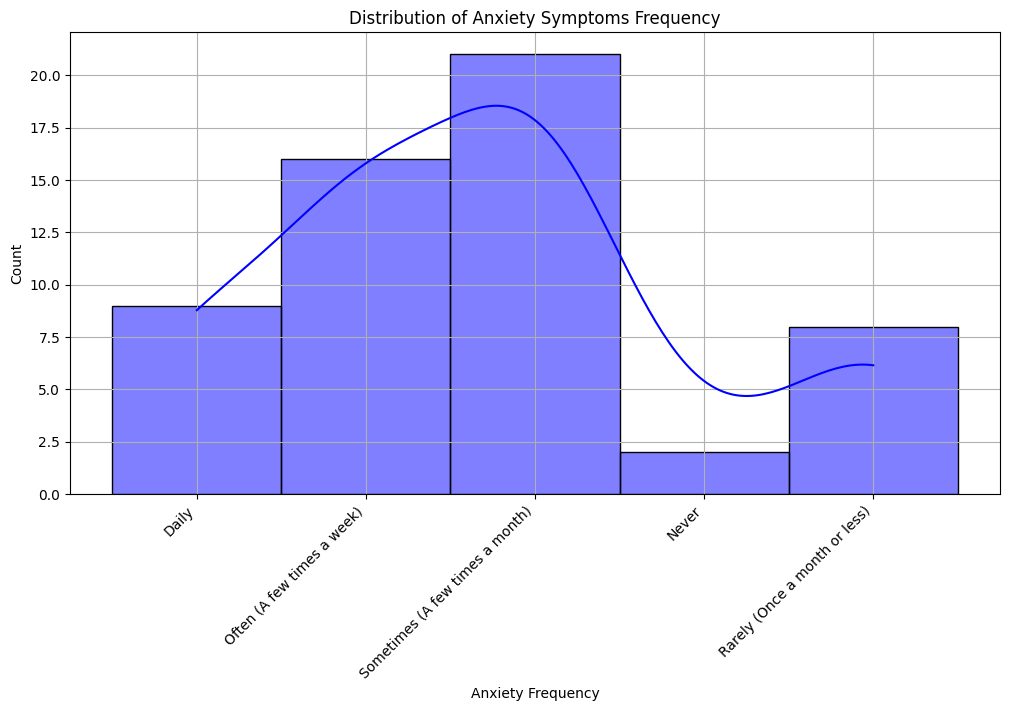

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size

sns.histplot(df['Frequency of Anxiety Symptoms'], bins=10, kde=True, color='blue')

plt.title('Distribution of Anxiety Symptoms Frequency')
plt.xlabel('Anxiety Frequency')
plt.ylabel('Count')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.show()


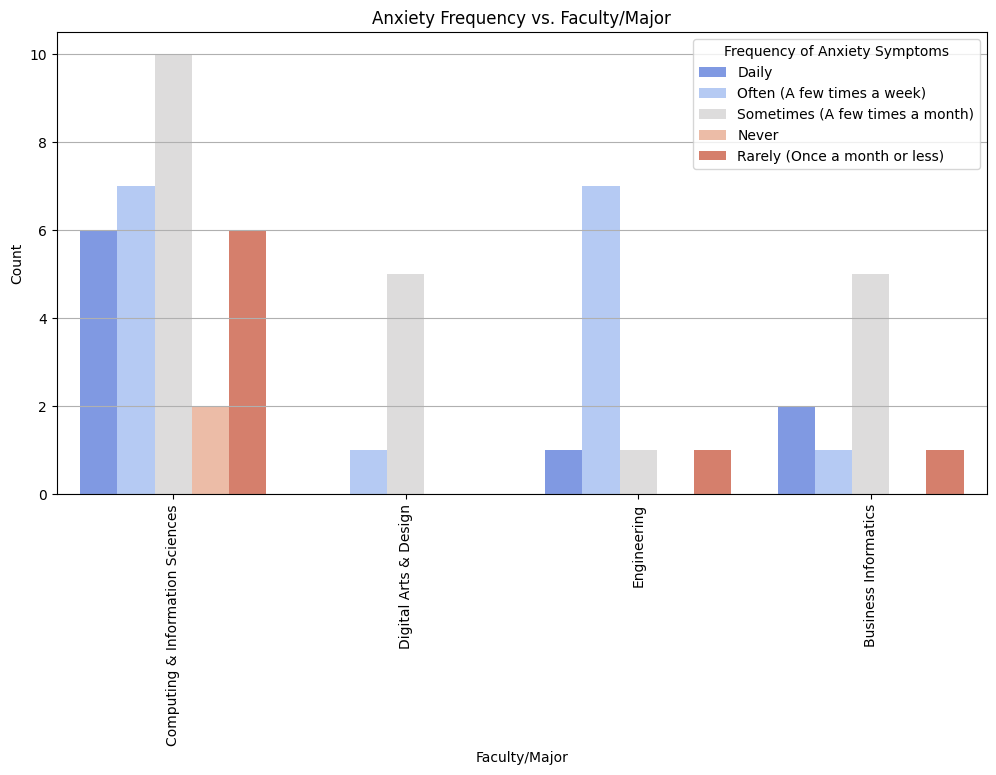

In [ ]:
plt.figure(figsize=(12, 6))

# Create the bar chart without averaging
sns.countplot(x=df['Faculty/Major'], hue=df['Frequency of Anxiety Symptoms'], palette="coolwarm")

# Improve readability
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title('Anxiety Frequency vs. Faculty/Major')
plt.xlabel('Faculty/Major')
plt.ylabel('Count')
plt.legend(title='Frequency of Anxiety Symptoms')
plt.grid(axis='y')

plt.show()


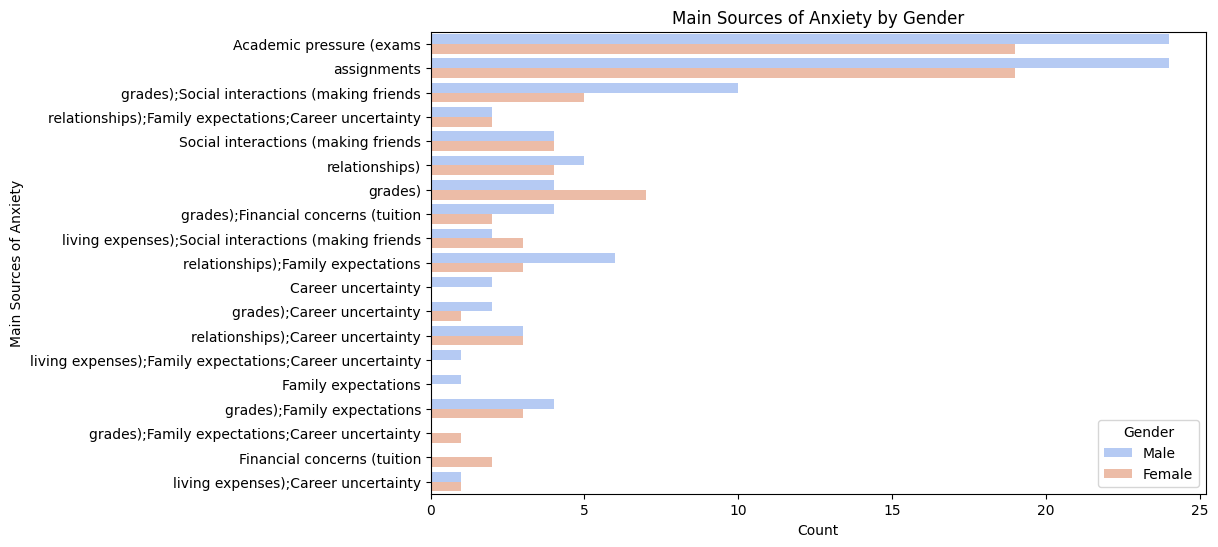

In [ ]:
df_exploded = df.explode('Main Sources of Anxiety in University Life')

plt.figure(figsize=(10, 6))
sns.countplot(y=df_exploded['Main Sources of Anxiety in University Life'], hue=df_exploded['Gender'], palette='coolwarm')

plt.title('Main Sources of Anxiety by Gender')
plt.xlabel('Count')
plt.ylabel('Main Sources of Anxiety')
plt.legend(title='Gender')
plt.show()


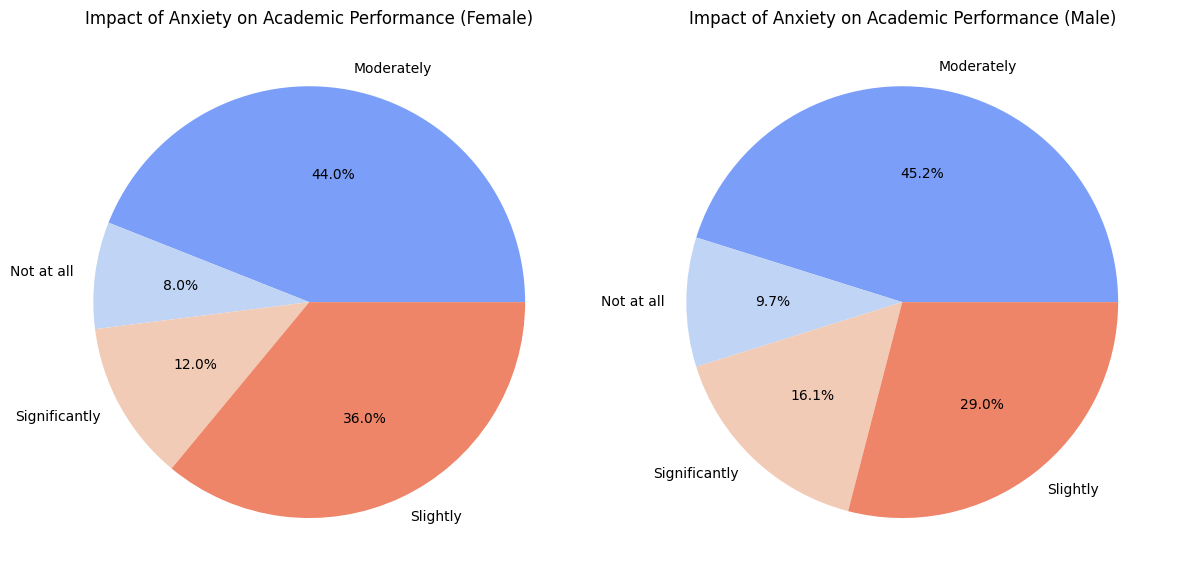

In [ ]:
# Count occurrences of each impact level per gender
impact_counts = df.groupby('Gender')['Impact of Anxiety on Academic Performance'].value_counts().unstack()

# Plot pie chart for each gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(impact_counts.index):
    axes[i].pie(impact_counts.loc[gender], labels=impact_counts.columns, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(impact_counts.columns)))
    axes[i].set_title(f'Impact of Anxiety on Academic Performance ({gender})')

plt.tight_layout()
plt.show()


In [29]:
# Split data by Faculty
faculties = df['Faculty/Major'].unique()
anxiety_groups = [df[df['Faculty/Major'] == faculty]['Frequency of Anxiety Symptoms'].astype('category').cat.codes for faculty in faculties]

# Perform ANOVA test
f_stat, p_value = f_oneway(*anxiety_groups)

print(f"F-Statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis - Anxiety levels vary across faculties.")
else:
    print("Fail to reject the null hypothesis - No significant difference in anxiety levels among faculties.")


F-Statistic: 3.7615466406299674
P-value: 0.016117412089227137
Reject the null hypothesis - Anxiety levels vary across faculties.
